In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [2]:
#Generating a synthetic dataset
# This dataset has 2 informative features, suitable for visualization
X, y = datasets.make_classification(
    n_samples=300, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, random_state=42
)

In [4]:
#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [5]:
#Standardize features for SVM
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
#Train SVM models with linear and RBF kernels
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [10]:
#Predictions and evaluation
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

y_prob_linear = svm_linear.predict_proba(X_test)[:, 1]
y_prob_rbf = svm_rbf.predict_proba(X_test)[:, 1]

metrics = {
    'linear': {
        'accuracy': accuracy_score(y_test, y_pred_linear),
        'precision': precision_score(y_test, y_pred_linear),
        'recall': recall_score(y_test, y_pred_linear),
        'auc': roc_auc_score(y_test, y_prob_linear)
    },
    'rbf': {
        'accuracy': accuracy_score(y_test, y_pred_rbf),
        'precision': precision_score(y_test, y_pred_rbf),
        'recall': recall_score(y_test, y_pred_rbf),
        'auc': roc_auc_score(y_test, y_prob_rbf)
    }
}

print("Performance metrics:")
print(metrics)


Performance metrics:
{'linear': {'accuracy': 0.9555555555555556, 'precision': 0.9545454545454546, 'recall': 0.9545454545454546, 'auc': np.float64(0.9851778656126482)}, 'rbf': {'accuracy': 0.9555555555555556, 'precision': 0.9761904761904762, 'recall': 0.9318181818181818, 'auc': np.float64(0.9891304347826086)}}


In [11]:
#Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

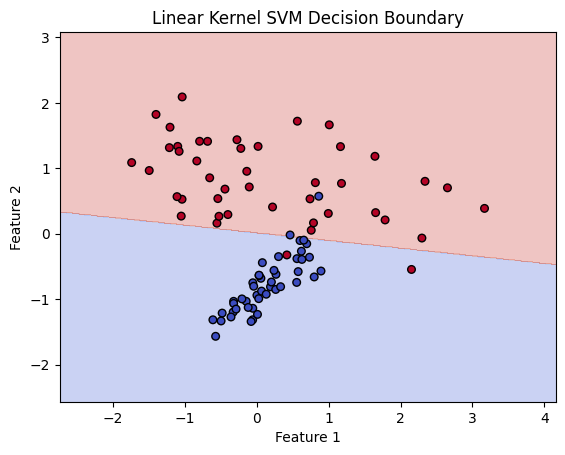

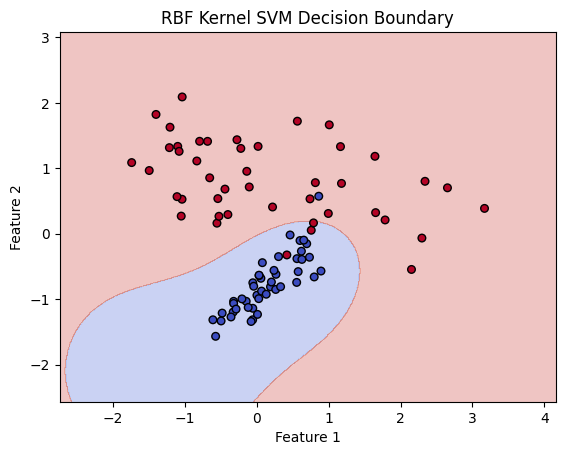

In [12]:
#Visualize decision boundaries
plot_decision_boundary(svm_linear, X_test, y_test, "Linear Kernel SVM Decision Boundary")
plot_decision_boundary(svm_rbf, X_test, y_test, "RBF Kernel SVM Decision Boundary")